In [6]:
#importing libraries :
import pandas as pd
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from matplotlib import pylab as plt  # PyLab is a procedural interface to the Matplotlib object-oriented plotting library.

from statsmodels.graphics.gofplots import qqplot  # Can take arguments specifying the parameters for dist or fit them automatically.

from IPython.core.interactiveshell import InteractiveShell  # An enhanced, interactive shell for Python.
from collections import Counter


In [10]:
df = pd.read_csv("/content/salesdata.csv")

In [11]:
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
169023,272938,Apple Airpods Headphones,1,150,10/15/19 17:27,"282 Johnson St, Seattle, WA 98101"
169024,272939,USB-C Charging Cable,1,11.95,10/29/19 10:58,"231 Lincoln St, Boston, MA 02215"
169025,272940,Lightning Charging Cable,1,14.95,10/05/19 22:31,"304 Spruce St, Los Angeles, CA 90001"
169026,272941,Lightning Charging Cable,1,14.95,10/29/19 00:52,"98 Forest St, Seattle, WA 98101"


In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
169023,272938,Apple Airpods Headphones,1,150,10/15/19 17:27,"282 Johnson St, Seattle, WA 98101"
169024,272939,USB-C Charging Cable,1,11.95,10/29/19 10:58,"231 Lincoln St, Boston, MA 02215"
169025,272940,Lightning Charging Cable,1,14.95,10/05/19 22:31,"304 Spruce St, Los Angeles, CA 90001"
169026,272941,Lightning Charging Cable,1,14.95,10/29/19 00:52,"98 Forest St, Seattle, WA 98101"
169027,272941,Wired Headphones,2,11.99,1,NaN


**Data** **Preprocessing**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169028 entries, 0 to 169027
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          168539 non-null  object
 1   Product           168539 non-null  object
 2   Quantity Ordered  168539 non-null  object
 3   Price Each        168539 non-null  object
 4   Order Date        168539 non-null  object
 5   Purchase Address  168538 non-null  object
dtypes: object(6)
memory usage: 7.7+ MB


**Categorical Variables **

In [15]:
# getting unique catrgorical variable
categorical = df.select_dtypes(['category', 'object']).columns
for col in categorical:
    print('{} : {} unique value(s)'.format(col, df[col].nunique()))

Order ID : 161376 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 10 unique value(s)
Price Each : 24 unique value(s)
Order Date : 129257 unique value(s)
Purchase Address : 130066 unique value(s)


In [16]:
#Missing values
mv_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
mv_count[0:10]

Order ID            489
Product             489
Quantity Ordered    489
Price Each          489
Order Date          489
Purchase Address    490
dtype: int64

In [18]:
df=df.dropna(how = 'all')
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
169027,272941,Wired Headphones,2,11.99,1,NaN


In [19]:



# future warning! ValueError: invalid literal for int() with base 10: 'Or'
"Clean Future Warnings:"
df = df[df['Order Date'].str[0:2] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
169023,272938,Apple Airpods Headphones,1,150,10/15/19 17:27,"282 Johnson St, Seattle, WA 98101"
169024,272939,USB-C Charging Cable,1,11.95,10/29/19 10:58,"231 Lincoln St, Boston, MA 02215"
169025,272940,Lightning Charging Cable,1,14.95,10/05/19 22:31,"304 Spruce St, Los Angeles, CA 90001"
169026,272941,Lightning Charging Cable,1,14.95,10/29/19 00:52,"98 Forest St, Seattle, WA 98101"


In [20]:
# convert the datatype
df['Quantity Ordered'], df['Price Each'] = df['Quantity Ordered'].astype('int64'), df['Price Each'].astype('float')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168205 entries, 0 to 169027
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          168205 non-null  object 
 1   Product           168205 non-null  object 
 2   Quantity Ordered  168205 non-null  int64  
 3   Price Each        168205 non-null  float64
 4   Order Date        168205 non-null  object 
 5   Purchase Address  168204 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.0+ MB


In [26]:
#convert order date column
df['Order Date'] = pd.to_datetime(df['Order Date'],  errors='coerce')


In [27]:
print (df)


       Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
169023   272938    Apple Airpods Headphones                 1      150.00   
169024   272939        USB-C Charging Cable                 1       11.95   
169025   272940    Lightning Charging Cable                 1       14.95   
169026   272941    Lightning Charging Cable                 1       14.95   
169027   272941            Wired Headphones                 2       11.99   

                Order Date                      Purchase Address  
0      2

In [74]:
df_sorted = df.sort_values(by='Sales', ascending=False)
print(df_sorted)

       Order ID                 Product  Quantity Ordered  Price Each  \
92032    210292      Macbook Pro Laptop                 2     1700.00   
127273   200528      Macbook Pro Laptop                 2     1700.00   
5219     181544      Macbook Pro Laptop                 2     1700.00   
4717     181069      Macbook Pro Laptop                 2     1700.00   
76342    149611         ThinkPad Laptop                 2      999.99   
...         ...                     ...               ...         ...   
17915    193647  AAA Batteries (4-pack)                 1        2.99   
119316   175423  AAA Batteries (4-pack)                 1        2.99   
158326   262725  AAA Batteries (4-pack)                 1        2.99   
8726     184889  AAA Batteries (4-pack)                 1        2.99   
127322   200574  AAA Batteries (4-pack)                 1        2.99   

                Order Date                       Purchase Address    Year  \
92032  2019-06-08 09:00:00  953 Ridge St, San 

<ipython-input-83-e524a0e494d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sales"], color = "green")


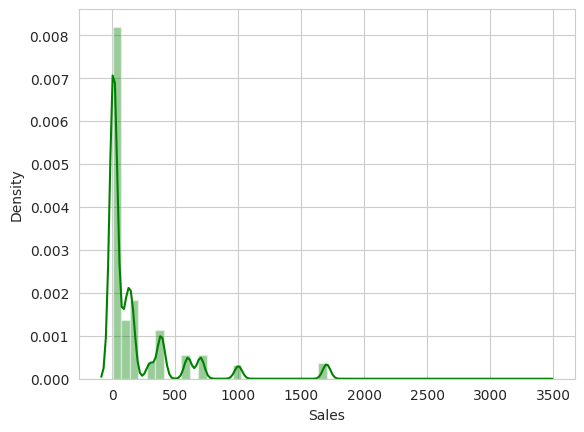

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [83]:
sns.distplot(df["Sales"], color = "green")
plt.show()
plt.figure()

In [41]:
def augment_data(data):

    """
    Adding new features to
    our data, adding Month Data,
    Hour Data, Minute Data, Sales Data,
    and Cities Column

    Returning:
        data with new features
    """

    # function to get the city in the data
    def get_city(address):
        return address.split(',')[1]if type (address) == str else str (address)

    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1] if type (address) == str else str (address)

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year

    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month

    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour

    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute

    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each']

    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

    return data # returning data
    df = df.dropna(thresh=n)


In [42]:
df = augment_data(df)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019.0,4.0,8.0,46.0,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019.0,4.0,22.0,30.0,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,4.0,14.0,38.0,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,4.0,14.0,38.0,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019.0,4.0,9.0,27.0,11.99,Los Angeles (CA)


<Axes: xlabel='Month', ylabel='Sales'>

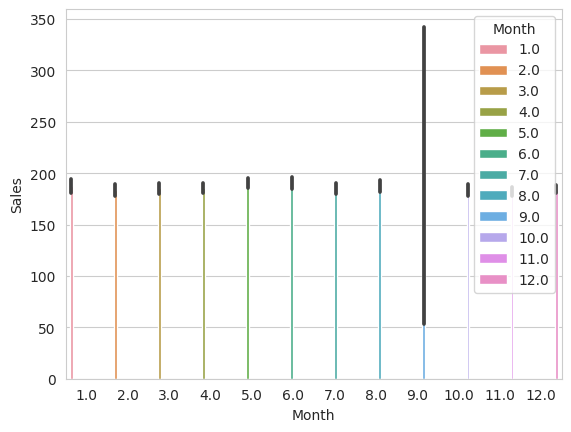

In [80]:

sns.barplot(x='Month',y='Sales',data=df,hue='Month')

**DATA ANALYSIS**

<ipython-input-43-8e72eab923dc>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True) # create a heatmap


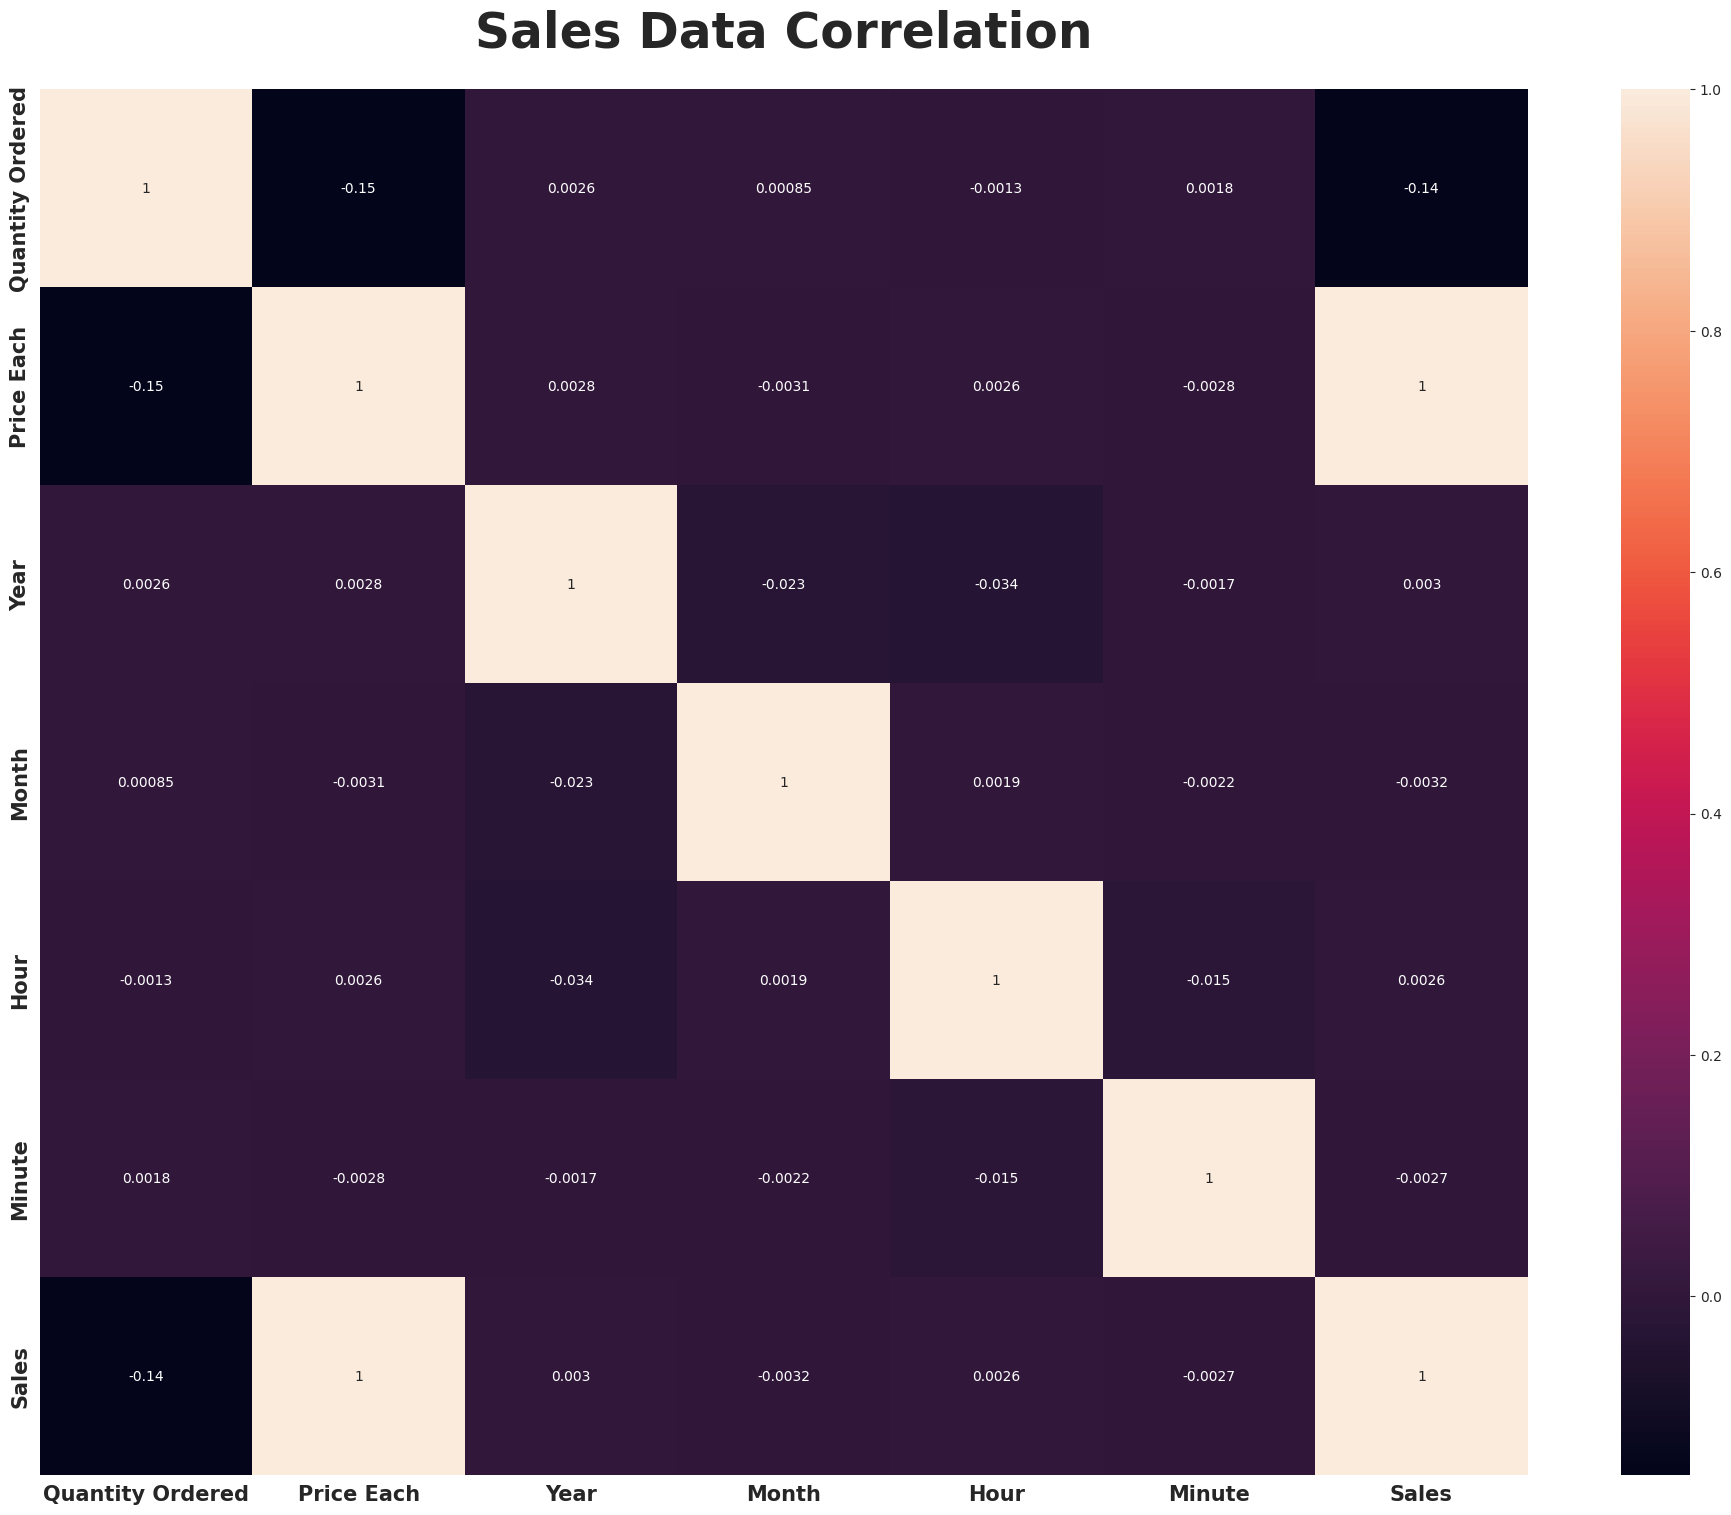

In [43]:
# set the seaborn style
sns.set_style("whitegrid")

# let's make a correlation matrix for `cop_data`
plt.figure(figsize=(24, 18)) # figure the size
sns.heatmap(df.corr(), annot=True) # create a heatmap
plt.title("Sales Data Correlation", weight="bold", fontsize=35, pad=30) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks

In [44]:
# Let's see the correlation from `sales_data`
(df.corr()['Sales'] # transform it into data corr
           .sort_values(ascending=False) # sort values
           .to_frame() # change it into data frame
           .T) # transpose it

<ipython-input-44-d9b0501f42ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df.corr()['Sales'] # transform it into data corr


,Sales,Price Each,Year,Hour,Minute,Month,Quantity Ordered
Sales,1.0,0.9992,0.002954,0.002551,-0.00273,-0.003183,-0.139419


In [45]:
# statistical measure of sales data without object type of data
data_num = df.describe(include=[np.number])
"Statistical Measure of Sales Data in Numeric Data"
data_num

,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sales
count,168205.000000,168205.000000,168204.000000,168204.000000,168204.000000,168204.000000,168205.000000
mean,1.124307,184.715580,2019.000202,6.817816,14.411304,29.484073,185.803917
std,0.443215,332.862988,0.014216,3.596018,5.417548,17.313515,333.055311
min,1.000000,2.990000,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.000000,6.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.000000,11.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,23.000000,59.000000,3400.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_num, *['Quantity Ordered'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_num, *['Price Each'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_num, *['Year'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data_num, *['Month'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_num, *['Quantity Ordered'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_num, *['Price Each'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_num, *['Year'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data_num, *['Month'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(data_num, *[[['Quantity Ordered', 'Price Each'], ['Price Each', 'Year'], ['Year', 'Month'], ['Month', 'Hour']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(data_num, *['Year', 'Quantity Ordered', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(data_num, *['Year', 'Price Each', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(data_num, *['Year', 'Month', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(data_num, *['Year', 'Hour', None], **{})
chart

In [46]:
 #statistical measure of sales data without numeric type of data
data_object = df.describe(exclude=[np.number])
"Statistical Measure of Sales Data in Object / Str Data"
data_object

<ipython-input-46-fc5092d100e5>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_object =df.describe(exclude=[np.number])


,Order ID,Product,Order Date,Purchase Address,Cities
count,168205,168205,168204,168204,168205
unique,161375,19,129255,130065,11
top,160873,USB-C Charging Cable,2019-12-15 20:16:00,"193 Forest St, San Francisco, CA 94016",San Francisco (CA)
freq,5,19711,8,9,40595
first,NaN,NaN,2019-01-01 03:07:00,NaN,NaN
last,NaN,NaN,2020-01-01 05:13:00,NaN,NaN


UNIVARIATE Analysis

In [47]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, t1, t2):

    """
    Showing visualization of univariate
    analysis with displot and qqplot
    visualization from seaborn and statsmodel
    library.

    Parameters
    ----------
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If ``x`` and ``y`` are absent, this is
        interpreted as wide-form. Otherwise it is expected to be long-form.
    title1(t1): The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
    title2(t2): The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.

    Returns
    -------
    fig : matplotlib figure
        Returns the Figure object with the plot drawn onto it.
    """

    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )

    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )

    ax1.set_title( # set the title 1
        t1,
        weight="bold", # weight
        fontsize=25, # font-size
        pad=30 # padding
    )

    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line
    )

    ax2.set_title( # set the title 2
        t2,
        weight="bold", # weight
        fontsize=25, # font-size
        pad=30 # padding
    )

    return fig # returning the figure


<ipython-input-47-2bc1cb20cd77>:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( # create a distplot visualization


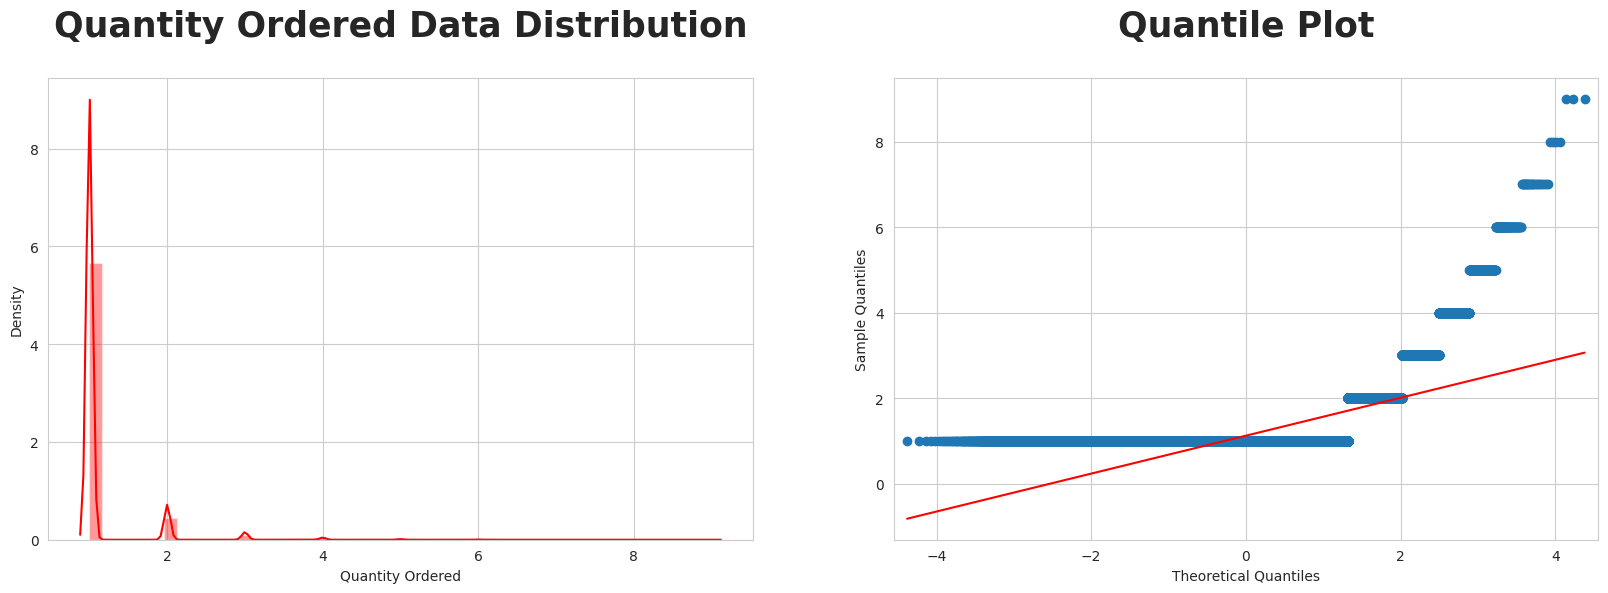

In [57]:
from traitlets.config.application import T
univariate_analysis( # call the function
    data=df['Quantity Ordered'], # put the data
    color='red', # pick the color
    t1='Quantity Ordered Data Distribution', # title1
    t2='Quantile Plot' # title2
);

<ipython-input-47-2bc1cb20cd77>:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( # create a distplot visualization


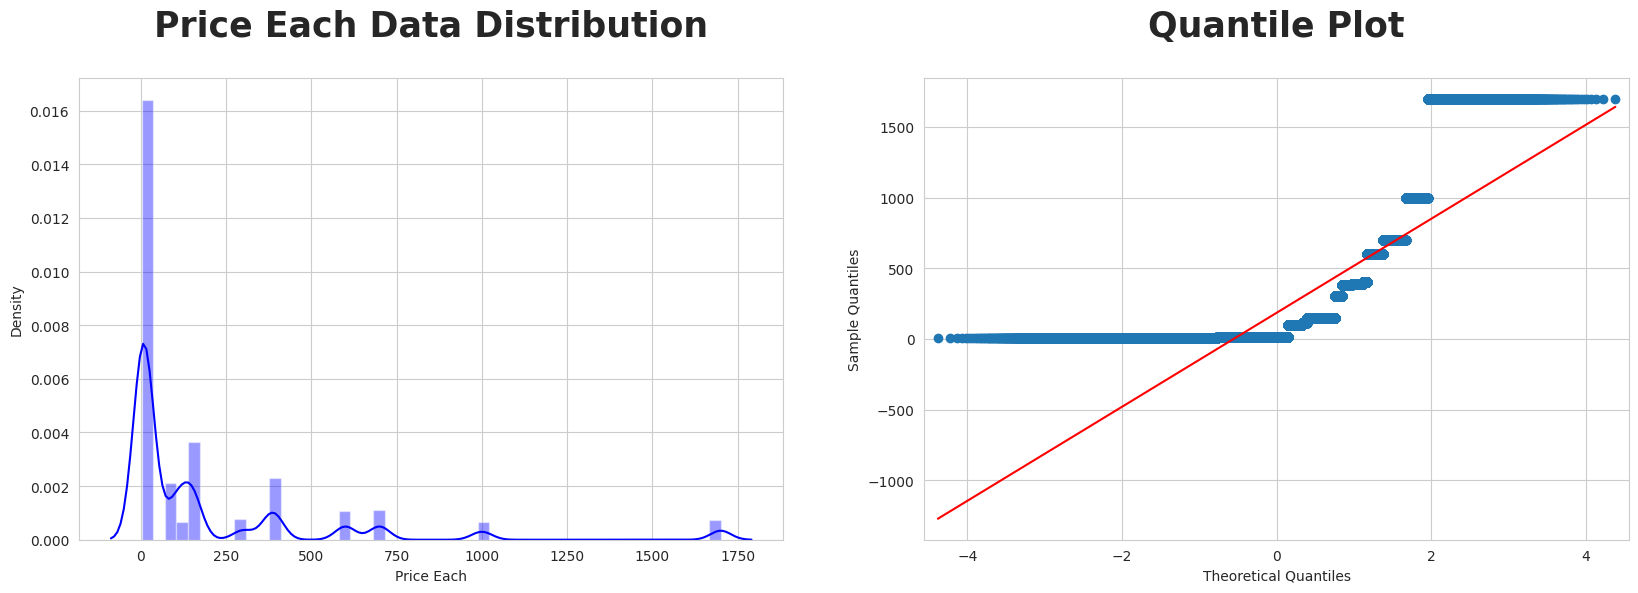

In [58]:
# Price Each Data
univariate_analysis( # call the function
    data=df['Price Each'], # put the data
    color='blue', # pick the color
    t1='Price Each Data Distribution', # title1
    t2='Quantile Plot' # title2
);

<ipython-input-47-2bc1cb20cd77>:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( # create a distplot visualization


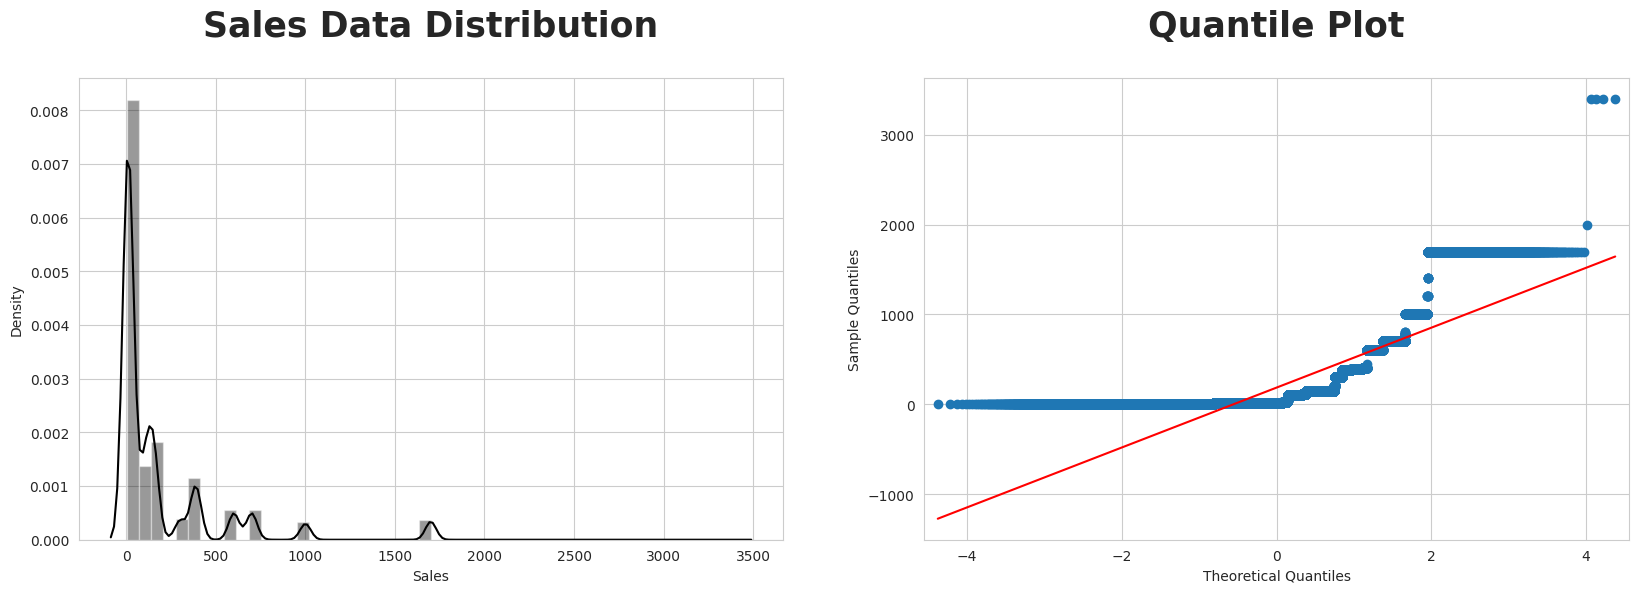

In [59]:
# Sales Data
univariate_analysis( # call the function
    data=df['Sales'], # put the data
    color='black', # pick the color
    t1='Sales Data Distribution', # title1
    t2='Quantile Plot' # title2
);

In [60]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = df.skew().sort_values(ascending=False)
skew_value

<ipython-input-60-5cfe0aea182b>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew_value = df.skew().sort_values(ascending=False)


Year                70.315467
Quantity Ordered     4.855617
Sales                2.877008
Price Each           2.866267
Order ID             0.156552
Month                0.080238
Minute               0.003843
Hour                -0.527427
dtype: float64

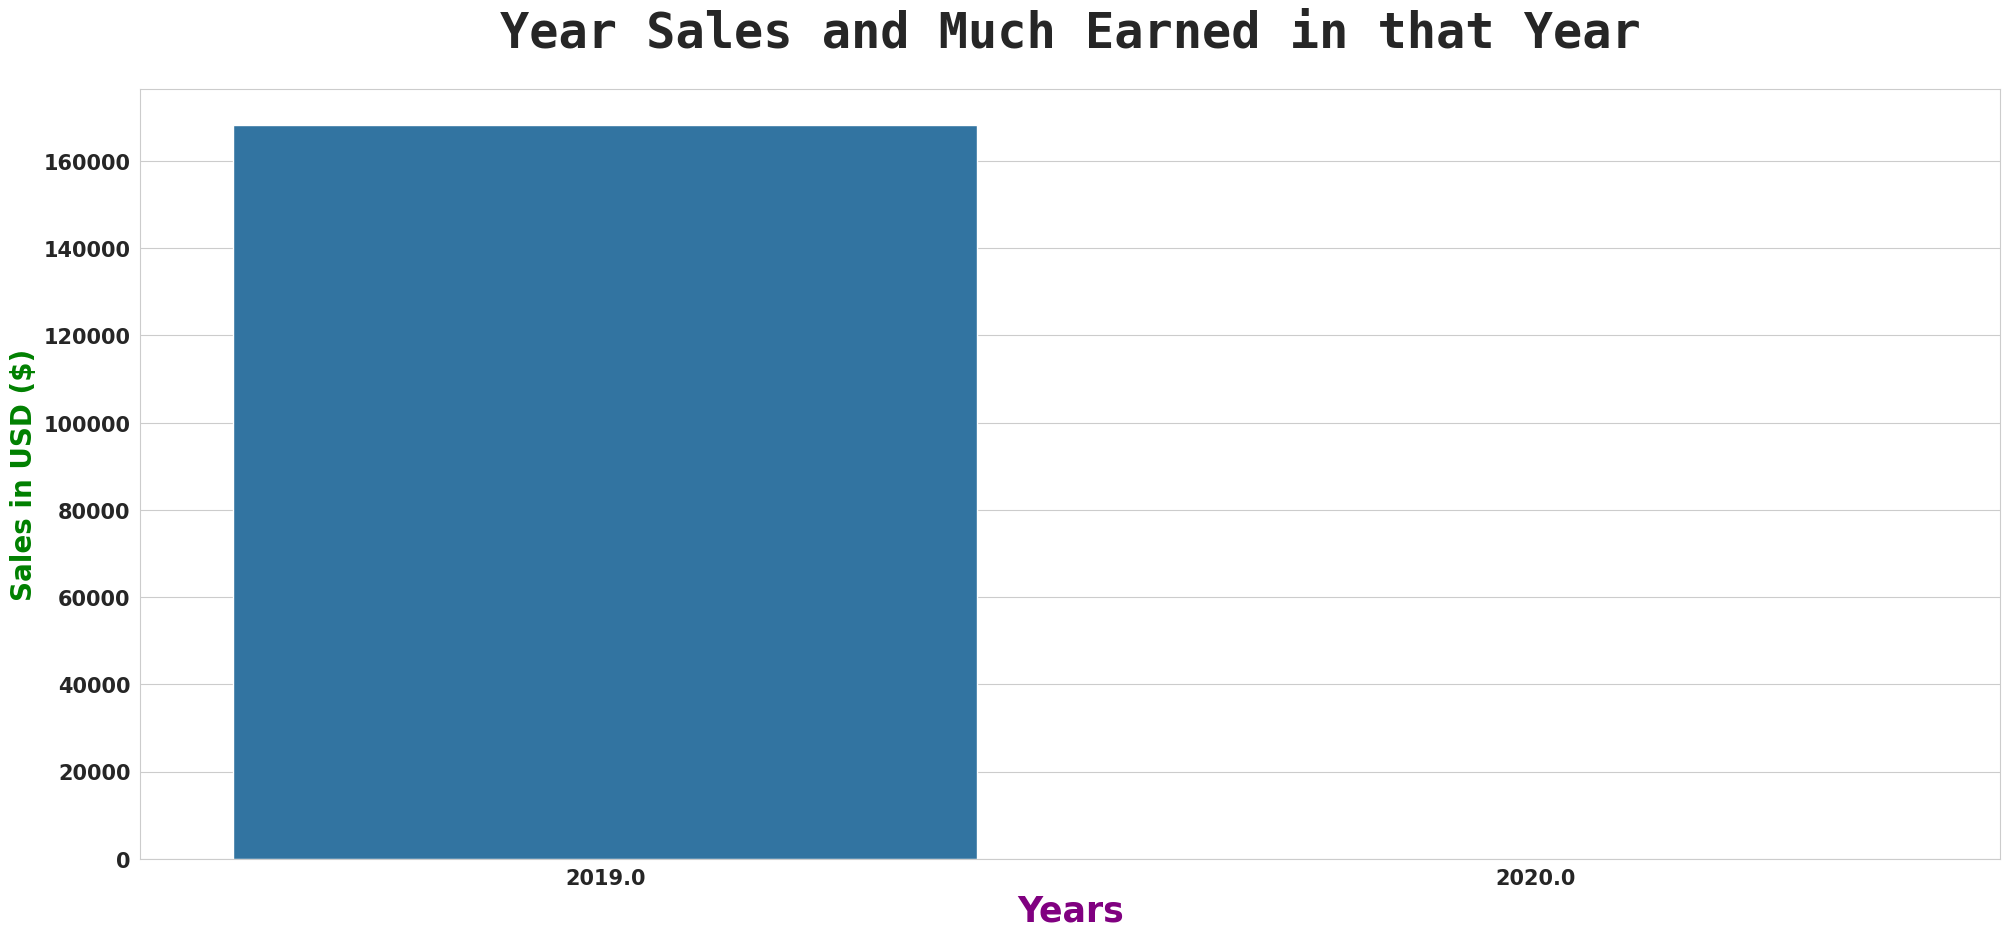

In [61]:
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size

# makes count plot
sns.countplot(
    x="Year",
    data=df
)
plt.title( # title
    "Year Sales and Much Earned in that Year",
    fontname="monospace", # font-name
    weight="bold", # weiqht
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Years",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in USD ($)",
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

<ipython-input-62-f38ca7f64415>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_of_month_and_earned = df.groupby('Month').sum().astype('int')


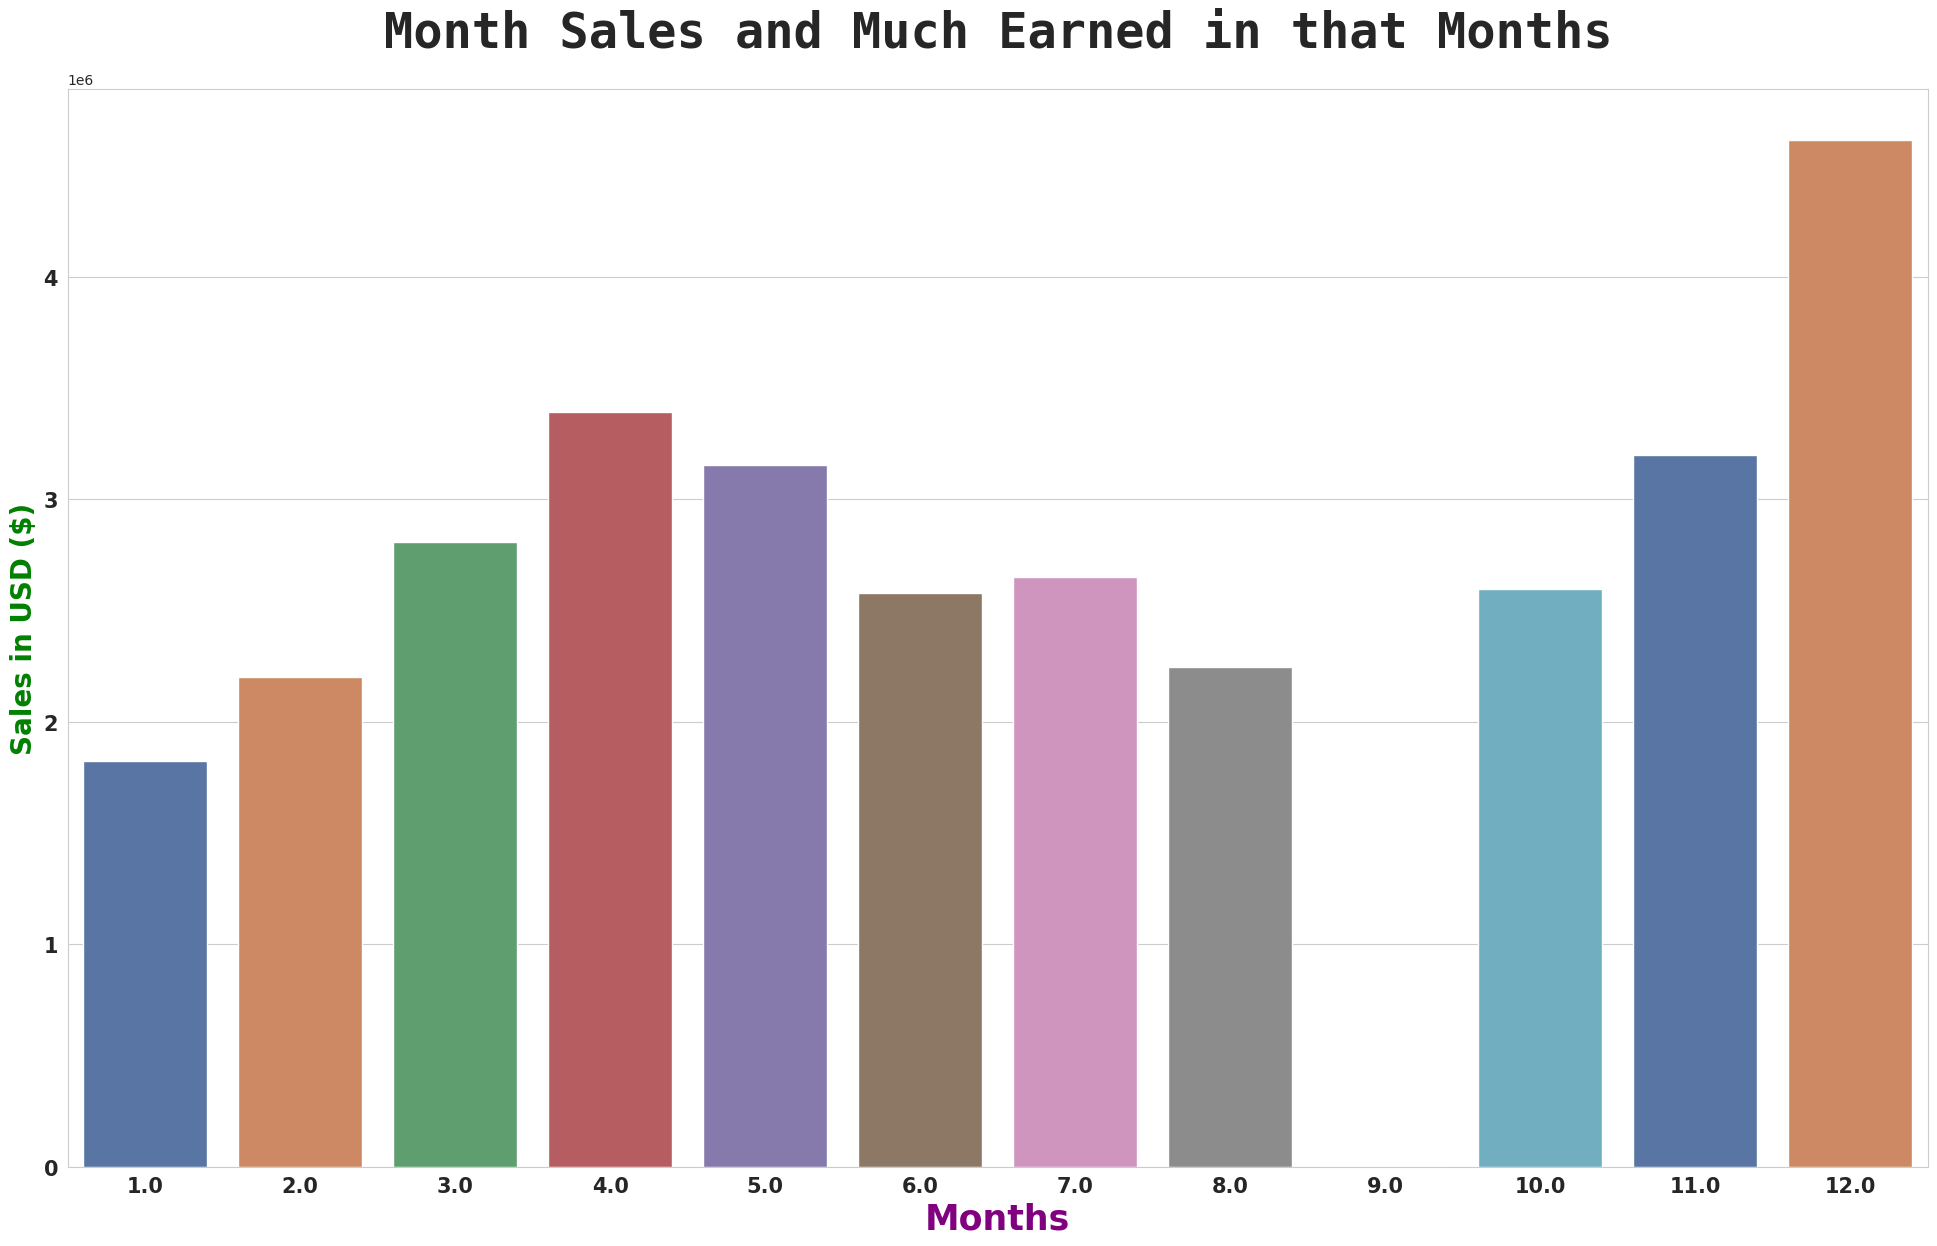

In [62]:
# group the Month cols
sum_of_month_and_earned = df.groupby('Month').sum().astype('int')

# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size

# makes bar plot
sns.barplot( # barplot
    x=sum_of_month_and_earned.index, # x-axis
    y=sum_of_month_and_earned["Sales"], # y-axis
    data=sum_of_month_and_earned, # data
    palette="deep" # palette
)
plt.title( # title
    "Month Sales and Much Earned in that Months",
    fontname="monospace", # font-name
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Months",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in USD ($)",
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

<ipython-input-63-10ec06fb43e9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  highest_number_of_sales = df.groupby('Cities').sum().astype('int')


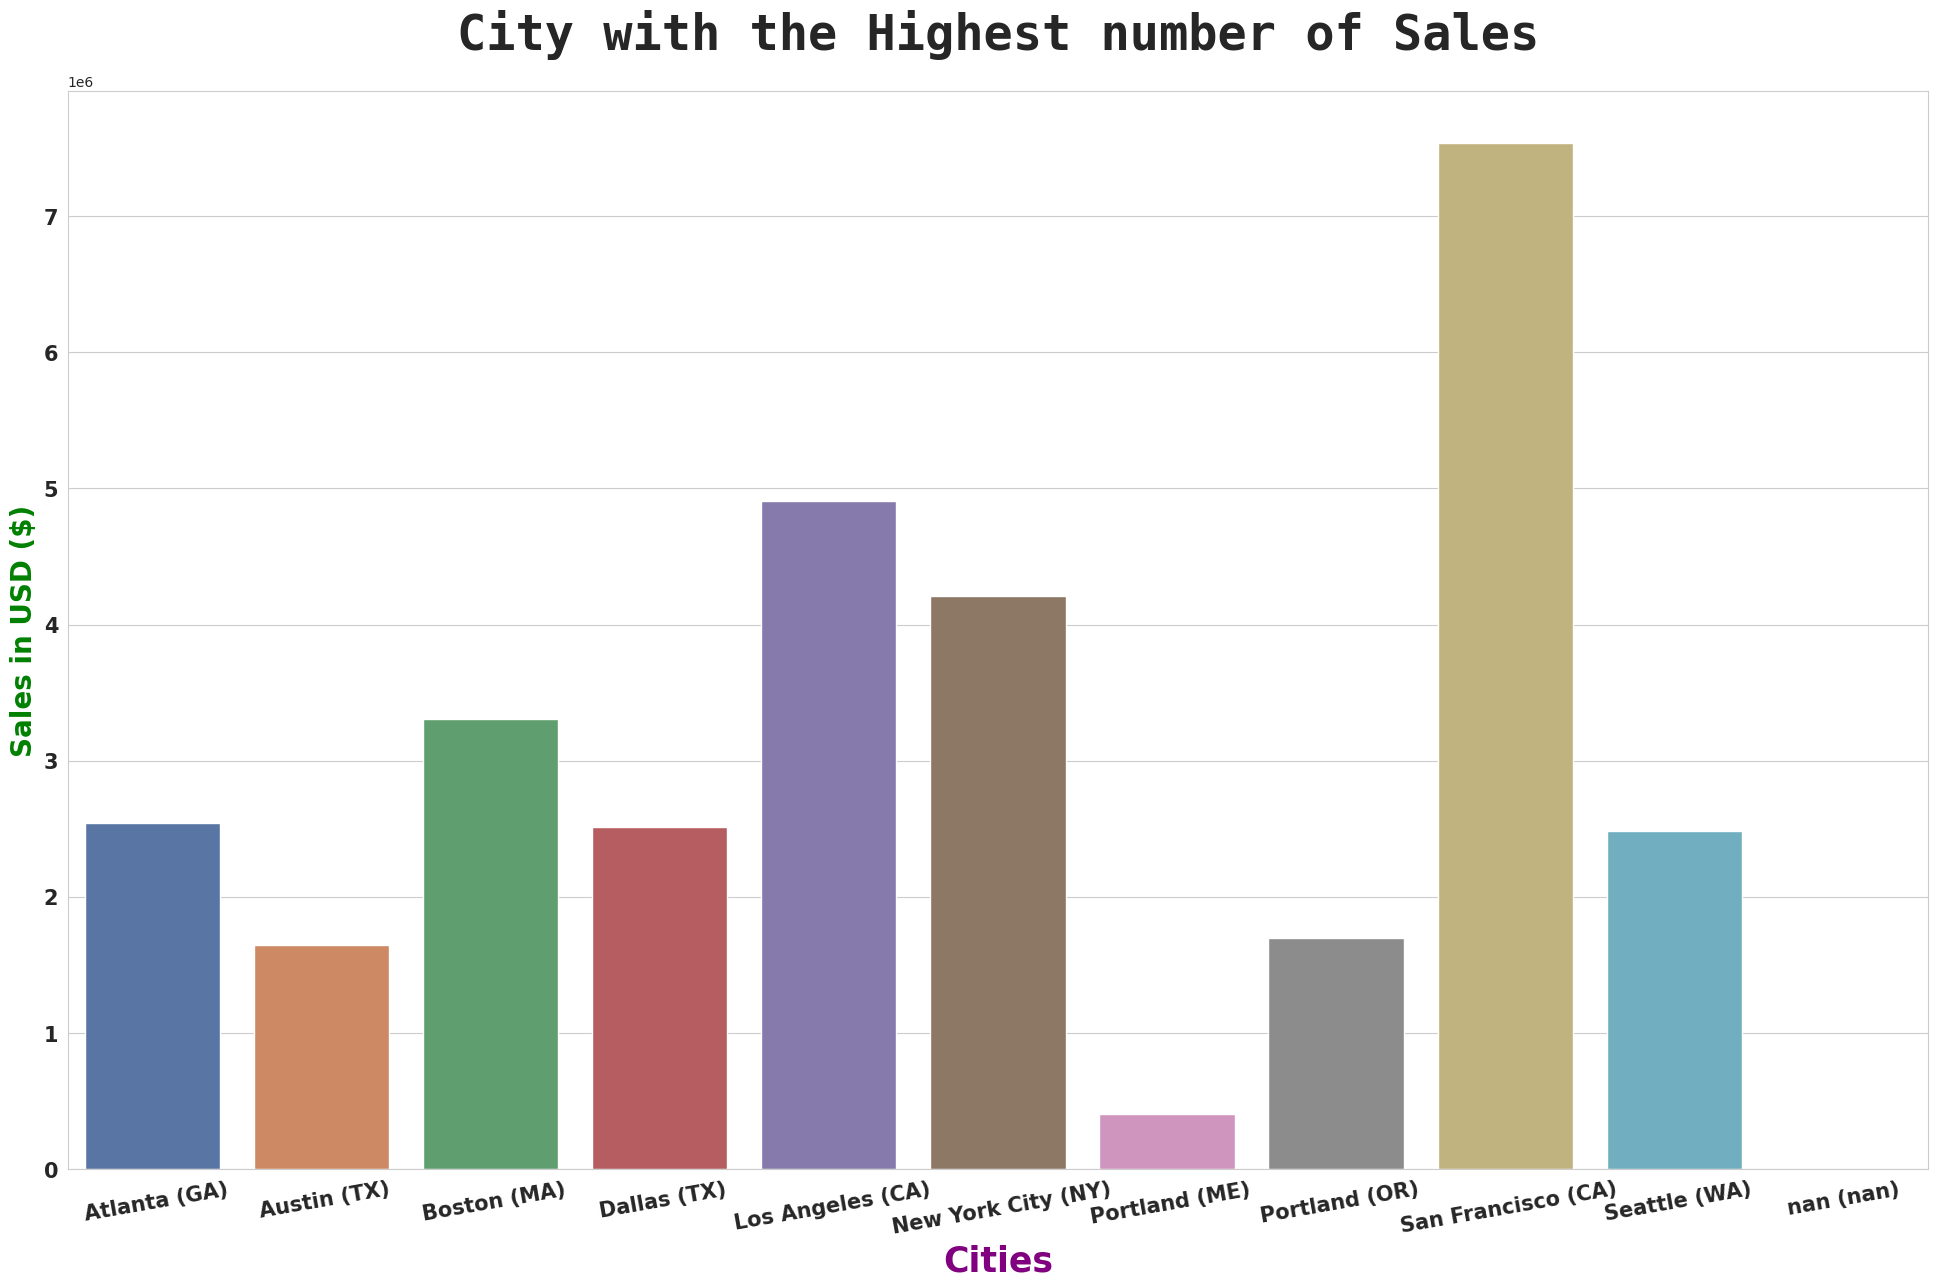

In [63]:
# group of the highest number of sales in city
highest_number_of_sales = df.groupby('Cities').sum().astype('int')

# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size

# makes bar plot
sns.barplot( # barplot
    x=highest_number_of_sales.index, # x-axis
    y=highest_number_of_sales["Sales"], # y-axis
    data=highest_number_of_sales, # data
    palette="deep" # palette
)
plt.title( # title
    "City with the Highest number of Sales",
    fontname="monospace", # font-name
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Cities",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10
)
plt.ylabel( # y-label
    "Sales in USD ($)",
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

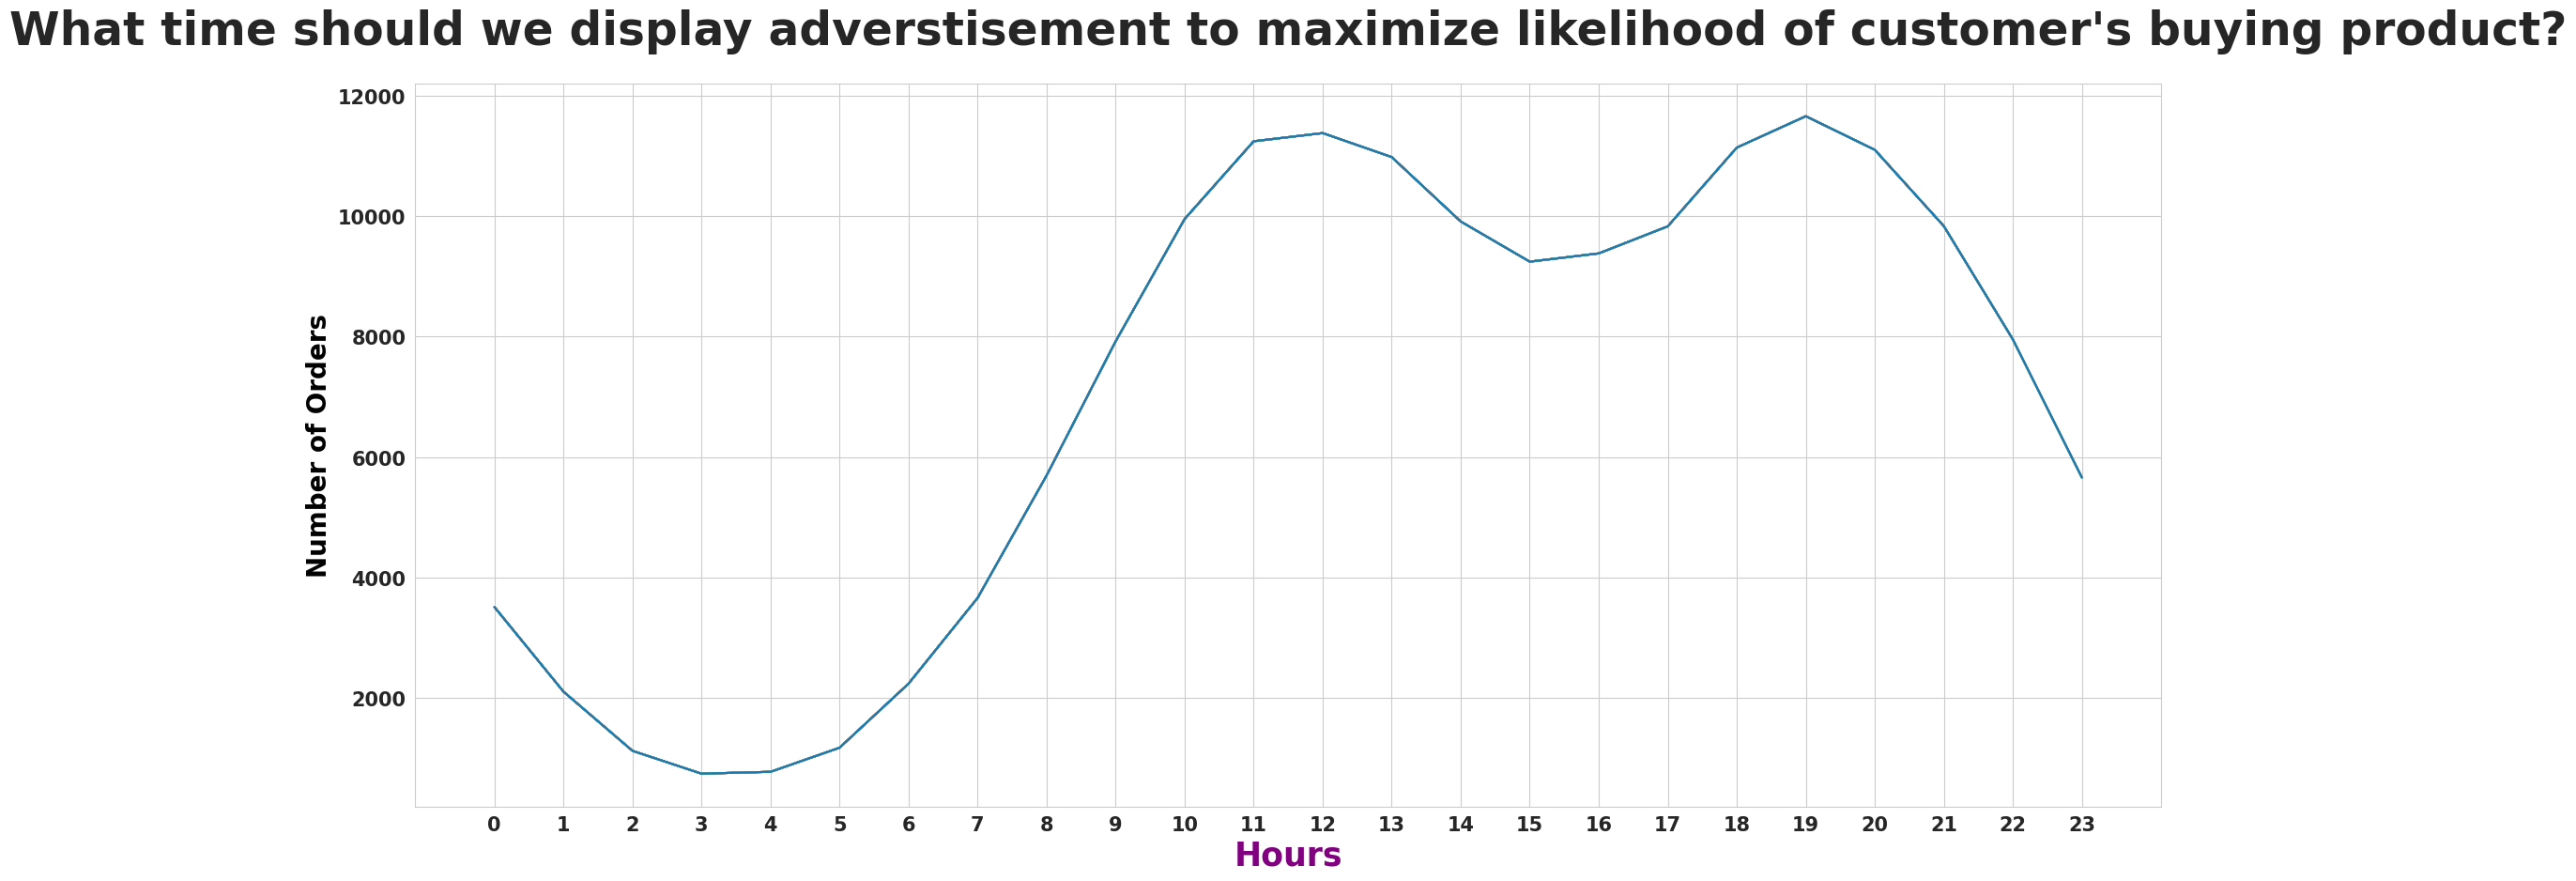

In [64]:
# let's prepare the value for the x-axis
hours = [hour for hour, df in df.groupby('Hour')]

#let's plot it
plt.figure(figsize=(24, 10)) # figuring the size

# makes bar plot
plt.plot( # plot
    hours, # x-axis
    df.groupby(['Hour']).count() # data
)

# let's add grid
plt.grid(True)
plt.title( # title
    "What time should we display adverstisement to maximize likelihood of customer's buying product?",
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30
)
plt.xlabel( # x-label
    "Hours",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    ticks=hours, # labels
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Number of Orders",
    weight="bold", # weight
    color="black", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

In [65]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = df[df['Order ID'].duplicated(keep=False)]

# create a new column
data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()

# create a new variable for Counter
count = Counter()

# make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# and make another for loop
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 917
('Google Phone', 'USB-C Charging Cable') 890
('iPhone', 'Wired Headphones') 403
('Google Phone', 'Wired Headphones') 383
('iPhone', 'Apple Airpods Headphones') 329
('Vareebadd Phone', 'USB-C Charging Cable') 328
('Google Phone', 'Bose SoundSport Headphones') 200
('USB-C Charging Cable', 'Wired Headphones') 149
('Vareebadd Phone', 'Wired Headphones') 136
('Lightning Charging Cable', 'Wired Headphones') 79


<ipython-input-65-916d33999db5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


<ipython-input-66-e43c9d238a51>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']
<ipython-input-66-e43c9d238a51>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df.groupby('Product').mean()['Price Each']
<ipython-input-66-e43c9d238a51>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels( # x-ticks


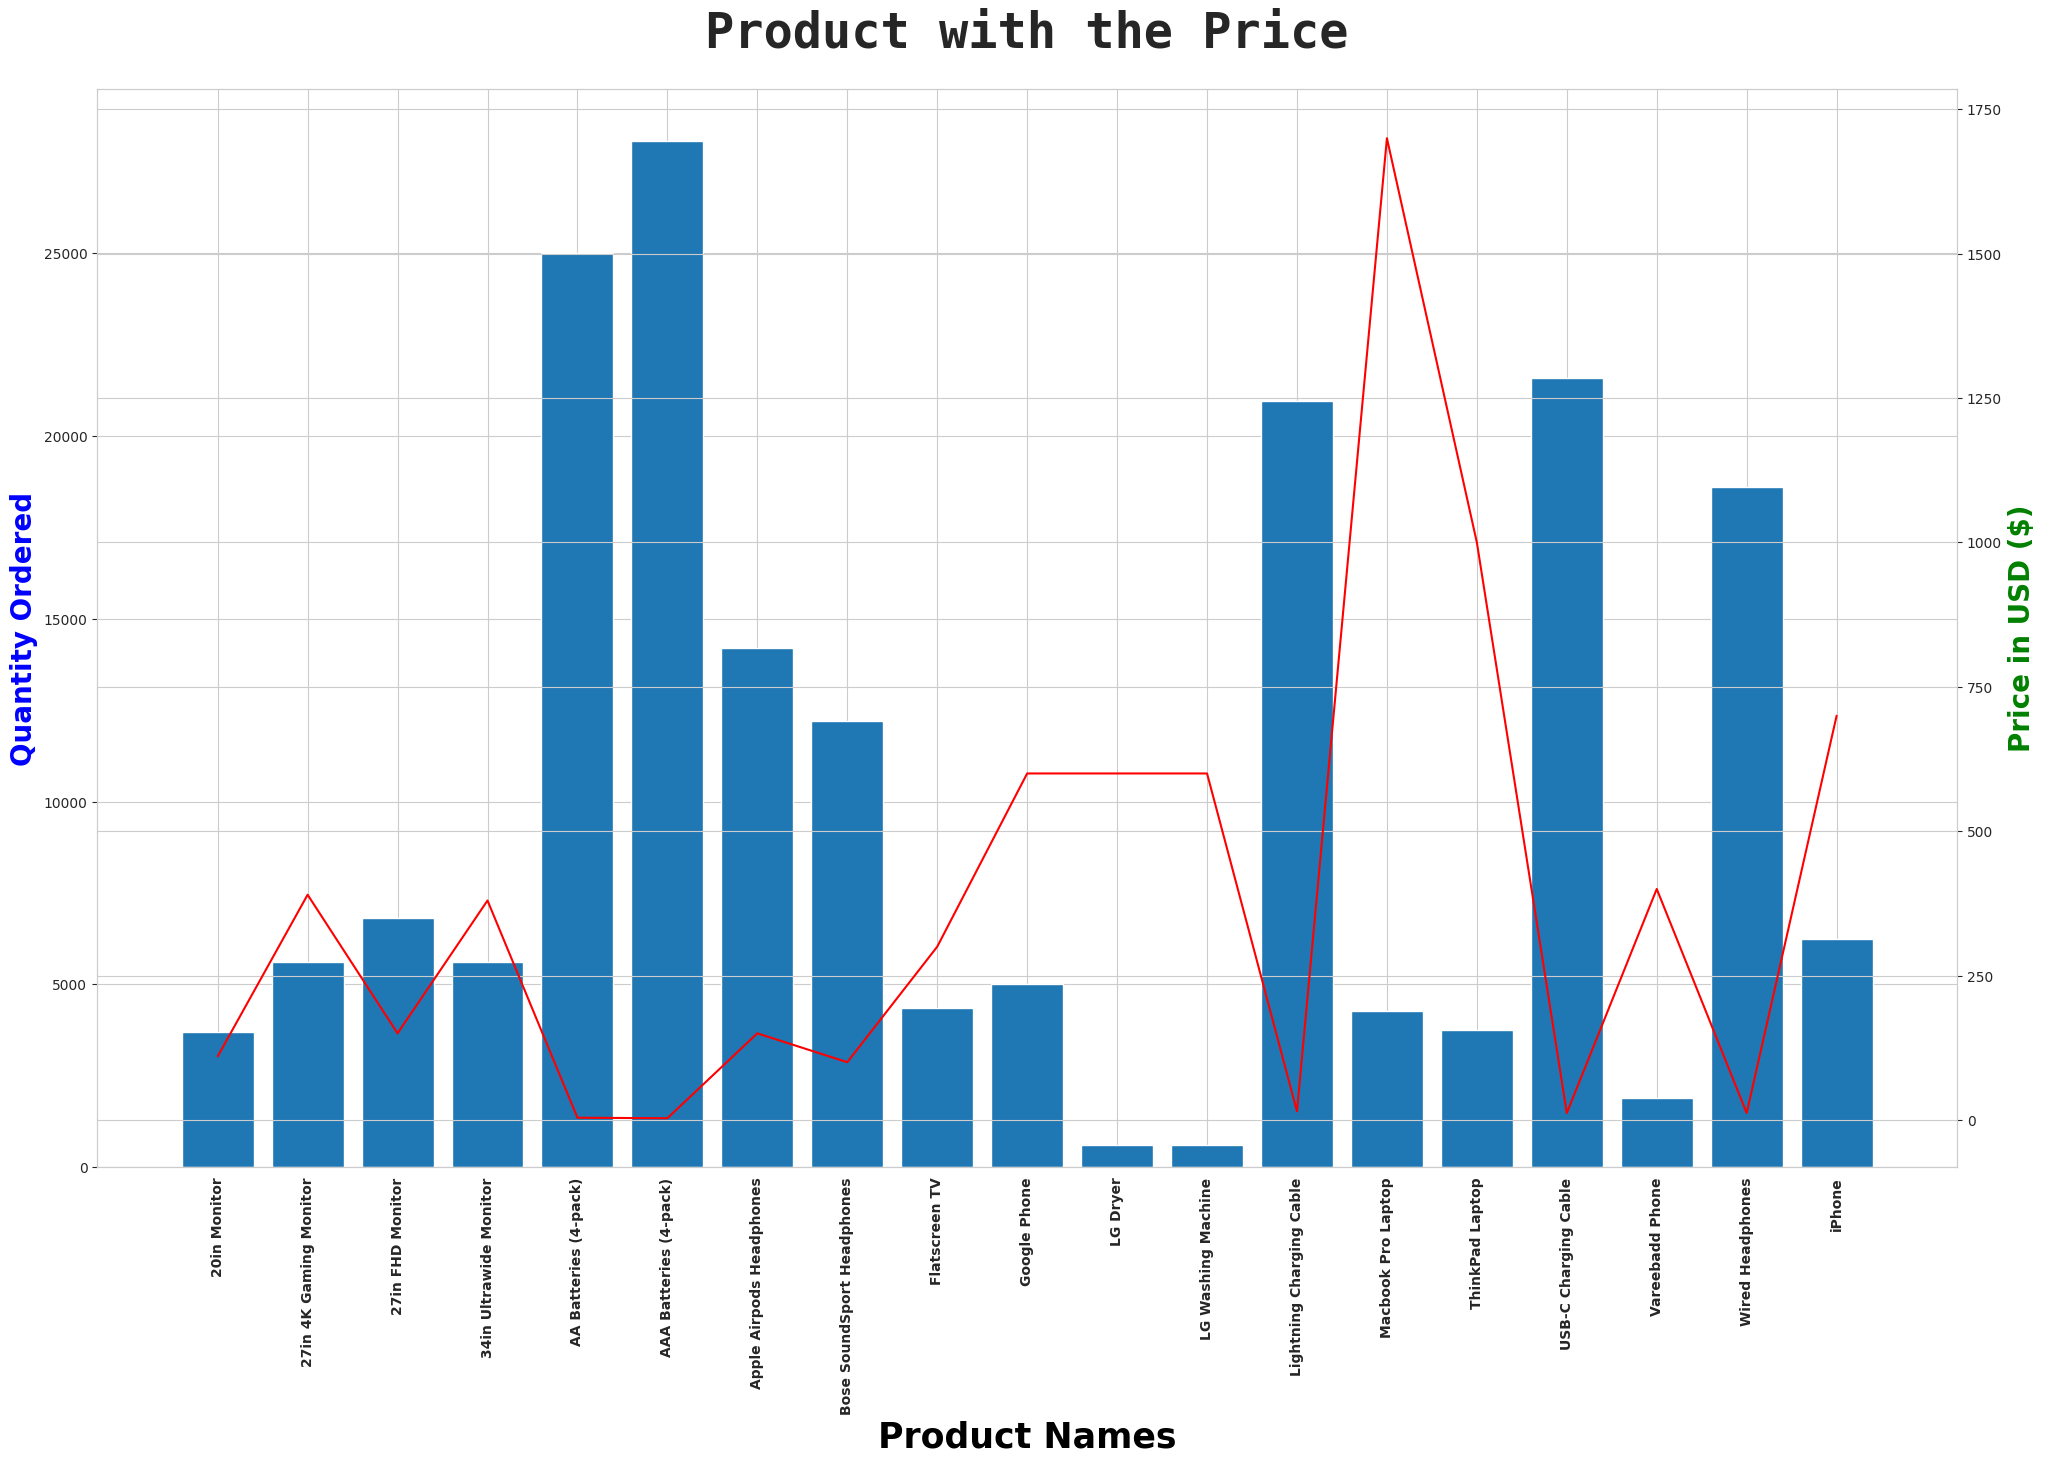

In [66]:
# lets prepare the varables for the plotting
# group the product
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products = [product for product, df in product_group]
"""Visualization"""

# let's make a subplots
fig, ax1 = plt.subplots(figsize=(24, 14))
ax2 = ax1.twinx()

# AXES 1
ax1.bar(products, quantity_ordered)
ax1.set_title( # title
    "Product with the Price",
    weight="bold", # weight
    fontname="monospace", # font-name
    fontsize=35, # font-size
    pad=30 # padding
)
ax1.set_xlabel( # x-label
    "Product Names",
    weight="bold", # weight
    fontsize=25, # font-size
    color="black" # color
)
ax1.set_ylabel( # y-label
    "Quantity Ordered",
    color="blue", # color
    fontsize=20, # font-size
    weight="bold" # weight
)
ax1.set_xticklabels( # x-ticks
    products, # ticks
    rotation="vertical", # rotation
    weight="bold" # weight
)

# AXES 2
ax2.plot( # plot
    products, # x-axis
    prices, # y-axis
    "r-"
)
ax2.set_ylabel( # y-label
    "Price in USD ($)",
    color="green", # color
    fontsize=20, # font-size
    weight="bold" # weight
);

In [67]:
df.Product.value_counts().to_frame().T

,USB-C Charging Cable,Lightning Charging Cable,AAA Batteries (4-pack),AA Batteries (4-pack),Wired Headphones,Apple Airpods Headphones,Bose SoundSport Headphones,27in FHD Monitor,iPhone,27in 4K Gaming Monitor,34in Ultrawide Monitor,Google Phone,Flatscreen TV,Macbook Pro Laptop,ThinkPad Laptop,20in Monitor,Vareebadd Phone,LG Washing Machine,LG Dryer
Product,19711,19556,18703,18604,17110,14106,12075,6771,6236,5610,5585,5014,4344,4269,3749,3679,1884,600,599


In [68]:
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency

product = df.Product.value_counts().sum()

In [69]:
usb_charging =df[df.Product == 'USB-C Charging Cable'].value_counts().sum()

# Calculating USB-C Charging Probability
P_USB = statistical_probability(usb_charging, product)
Pprime_USB = 1 - P_USB
print('Probability for next people will order USB-C Charging Cable: %.2f%%' % P_USB)
print('Probability for next people will not order USB-C Charging Cable: %.2f%%' % Pprime_USB)

Probability for next people will order USB-C Charging Cable: 0.12%
Probability for next people will not order USB-C Charging Cable: 0.88%


In [70]:
iphone = df[df.Product == 'iPhone'].value_counts().sum()

# Calculating iPhone Probability
P_iphone = statistical_probability(iphone, product)
Pprime_iphone = 1 - P_iphone
print('Probability for next people will order iPhone: %.2f%%' % P_iphone)
print('Probability for next people will not order iPhone: %.2f%%' % Pprime_iphone)

Probability for next people will order iPhone: 0.04%
Probability for next people will not order iPhone: 0.96%


In [71]:
google_phone = df[df.Product == 'Google Phone'].value_counts().sum()

# Calculating Google Phone Probability
P_google_phone = statistical_probability(google_phone, product)
Pprime_google_phone = 1 - P_google_phone
print('Probability for next people will order Google Phone: %.2f%%' % P_google_phone)
print('Probability for next people will not order Google Phone: %.2f%%' % Pprime_google_phone)

Probability for next people will order Google Phone: 0.03%
Probability for next people will not order Google Phone: 0.97%
